In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import fastcluster
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
 
#package to use 
import scipy.cluster.hierarchy 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [4]:
df = pd.read_csv('Mall_Customers.csv')
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [5]:
X_train = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [6]:
X_train

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [9]:
clustering =DBSCAN(eps=12.5, min_samples=4).fit(X_train)
DBSCAN_dataset = X_train.copy()
DBSCAN_dataset.loc[:, 'Cluster'] = clustering.labels_

In [10]:
DBSCAN_dataset.Cluster.value_counts().to_frame()

,Cluster
0,112
2,34
3,24
-1,18
1,8
4,4


In [11]:
df.head(1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39


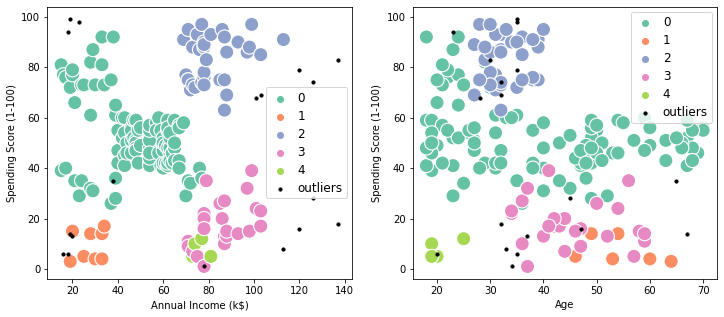

In [12]:
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster'] ==-1]
fig2, (axes) = plt.subplots(1,2,figsize=(12,5))
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
               data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],
               hue='Cluster', ax=axes[0], palette='Set2', legend ='full', s=200)
sns.scatterplot('Age', 'Spending Score (1-100)', 
               data = DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],
               hue = 'Cluster', palette='Set2', ax=axes[1], legend='full', s=200)
axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=10, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(),  fontsize='12')
plt.setp(axes[1].get_legend().get_texts(),  fontsize='12')
plt.show()